# Animated barplot - Real GDP per capita using gapminder data

To analyze a country's economic output (measured by real GDP per capita).

#### Penn World Table:  
Data is used from the Penn World Table version 10.0 of the Groningen Growth and Development Centre, which is a platform for research on economic growth and development. PWT version 10.0 is a database with information on relative levels of income, output, input, and productivity, covering 13 countries between 1950 and 2019.

www.ggdc.net/pwt

- 5 countries with the highest values for Real GDP per capita. 
- The groupby function is used to calculate the mean value of Real GDP per capita for each country, 
- nlargest(5) selects the top 5 countries based on these values.
- after filtering data was available for 2005 and 2011-2017 for my range
- rgdpe - Real GDP (in mil. 2017USD)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import os

In [2]:
!pip install openpyxl

In [4]:
df = pd.read_excel('../data/pwt1001.xlsx')

In [5]:
df

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088


In [6]:
df.dropna(inplace=True)

In [7]:
df

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
405,ARG,Argentina,Argentine Peso,2005,5.541011e+05,5.489292e+05,38.892931,15.749589,1771.678525,2.788760,...,0.139913,-0.103852,0.002337,0.347014,0.401726,0.427996,0.534476,0.515071,0.330981,1.165571
417,ARG,Argentina,Argentine Peso,2017,1.026128e+06,1.022513e+06,43.937140,20.033661,1648.812832,3.035439,...,0.089602,-0.106394,0.011239,0.640839,0.770372,0.498410,0.637246,0.614945,0.515486,1.201343
1175,BGR,Bulgaria,Bulgarian Lev,2005,9.162253e+04,1.008545e+05,7.686962,3.154664,1658.646399,2.990984,...,0.235810,-0.381817,0.068493,0.345268,0.410066,0.220608,0.514458,0.491572,0.325425,1.346967
1181,BGR,Bulgaria,Bulgarian Lev,2011,1.246690e+05,1.222604e+05,7.378650,3.136997,1643.592799,3.094154,...,0.347146,-0.471812,0.079217,0.510797,0.520991,0.298699,0.683379,0.580083,0.364845,1.036064
1182,BGR,Bulgaria,Bulgarian Lev,2012,1.254579e+05,1.252690e+05,7.334003,3.103989,1644.449844,3.105491,...,0.333161,-0.478036,0.080047,0.474106,0.485596,0.286088,0.662287,0.566068,0.333514,0.884798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12662,ZAF,South Africa,Rand,2012,6.956056e+05,6.986319e+05,52.832658,16.517950,2224.108195,2.596012,...,0.216012,-0.240581,0.001062,0.562227,0.533347,0.632044,0.664369,0.627457,0.375019,0.776801
12663,ZAF,South Africa,Rand,2013,7.032779e+05,7.036177e+05,53.687121,16.875900,2211.986347,2.635149,...,0.199626,-0.233908,-0.001576,0.514988,0.514063,0.557433,0.687846,0.635723,0.345538,0.687490
12664,ZAF,South Africa,Rand,2014,7.053910e+05,7.106683e+05,54.544186,16.992683,2209.091467,2.675951,...,0.185648,-0.218741,0.013825,0.491612,0.500575,0.515295,0.697915,0.652995,0.329836,0.624894
12666,ZAF,South Africa,Rand,2016,7.229462e+05,7.136016e+05,56.207646,17.984968,2218.455068,2.762902,...,0.170088,-0.179245,0.005021,0.404804,0.445430,0.406019,0.628334,0.590239,0.275335,0.487648


In [10]:
# Get the top 5 countries with highest real GDP per capita
top_countries = df.groupby('country')['rgdpe'].mean().nlargest(5).index

# Filter the data for the years and top countries
df_filtered = df[(df['year'].between(2000, 2017)) & (df['country'].isin(top_countries))]

for year in range(2000, 2018):
    df_year = df_filtered[df_filtered['year'] == year]  #Filter the data for the specific year
    
    # Check if the filtered df is not empty - data was missing for some years
    if not df_year.empty:   
        plt.figure(figsize=(10, 6),edgecolor='whitesmoke')
        sns.barplot(data=df_year, x='country', y='rgdpe',
                   width= 0.5)
        plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
        plt.title(f'Real GDP per capita - Top 5 Countries',fontsize=9)
        plt.ylabel('Real GDP per capita', fontsize=8)
        plt.xticks(rotation=45, fontsize=8,ha='right')
        xtick_labels = [str(label.get_text()).replace(' ', '\n') for label in plt.gca().get_xticklabels()]
        plt.gca().set_xticklabels(xtick_labels) #used to edit the ticklabes
        plt.yticks(fontsize=8)
        plt.axis([-1,5,0,2e7])
        
        # Add year label
        plt.text(4.7, 1.9e7, f'Year: {year}', fontsize=9, ha='right', va='top', 
             bbox= dict(facecolor='whitesmoke', boxstyle='round,pad=0.5'))
        
        plt.savefig(f'../bar_plots/barplot_{year}.png', dpi=300)  
        plt.tight_layout()
        plt.close()

In [11]:
#creating animated plots
images = []
for year in range(2000, 2018):
    filename = f'../bar_plots/barplot_{year}.png'
    if not os.path.exists(filename):
        continue
    images.append(imageio.v3.imread(filename))

output_filename = '../bar_plots/bar_animation.gif'
imageio.mimsave(output_filename, images, duration=300)


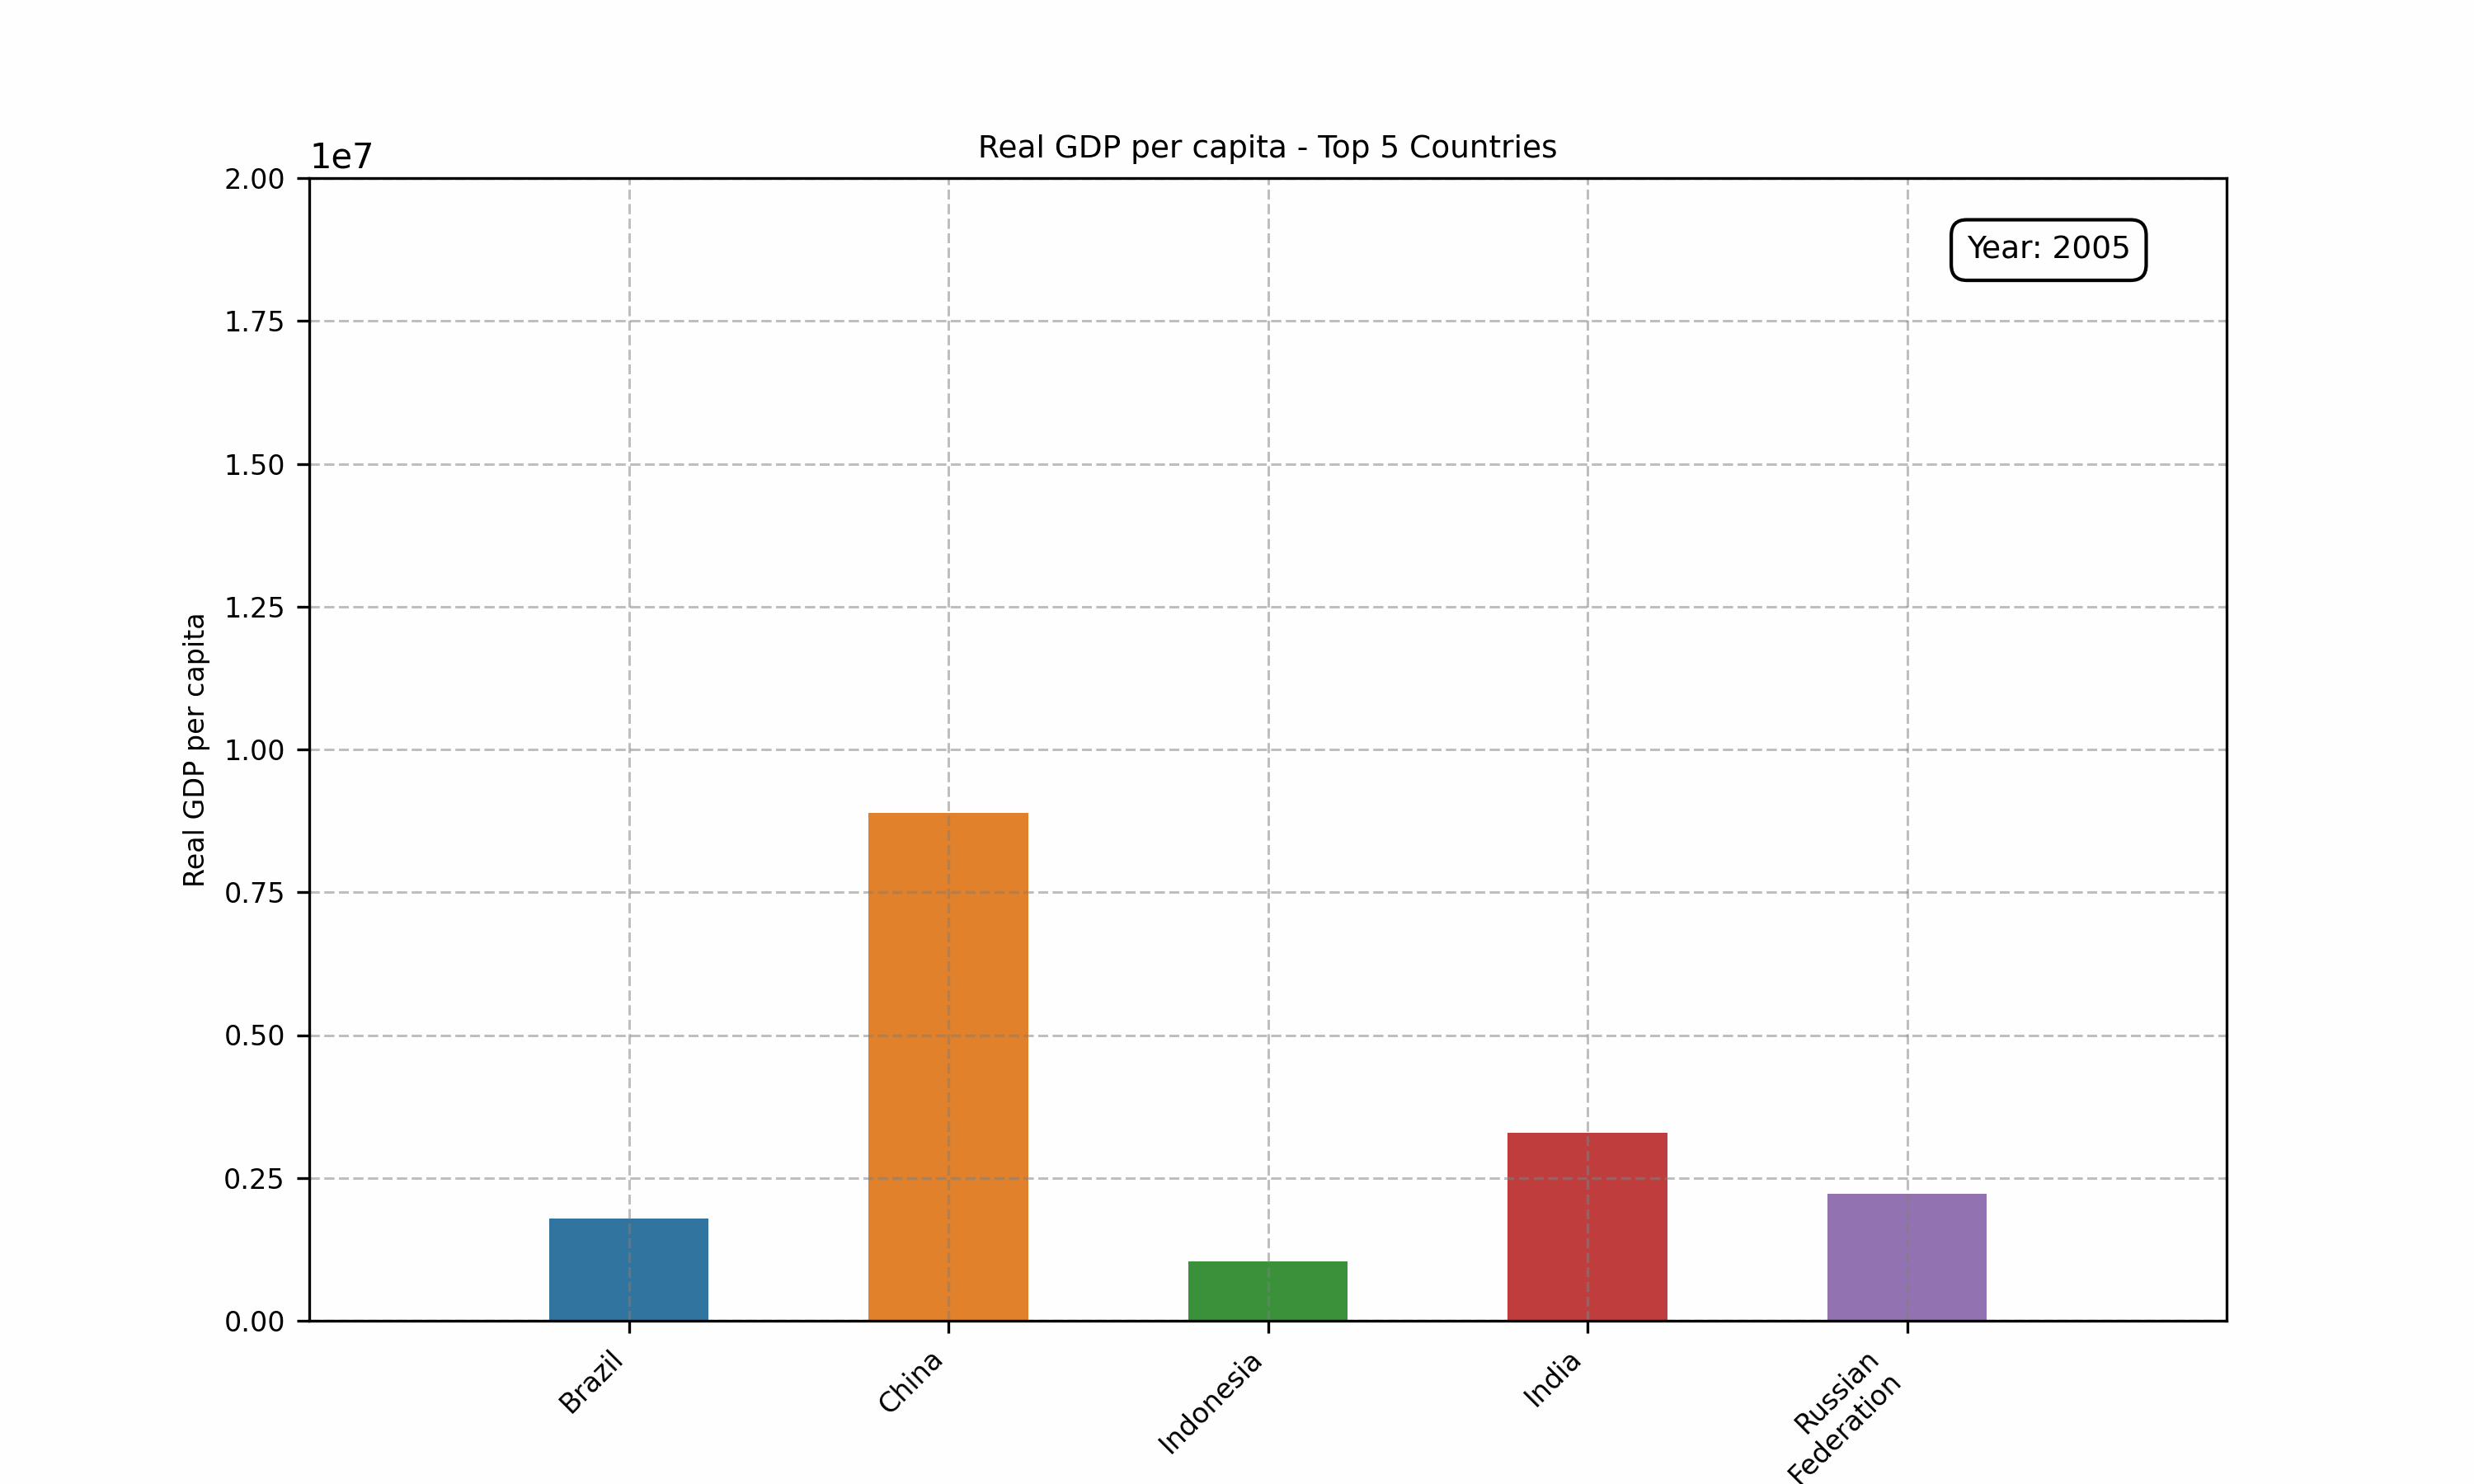

In [13]:
#display the gif
from IPython import display
display.Image("../bar_plots/bar_animation.gif")